In [1]:
%matplotlib inline
import sys
from collections import Counter
import re
import random

import pandas as pd
import matplotlib.pyplot as plt

from mecab import MeCab

from sklearn.model_selection import train_test_split

### DATA

1. 텍스트 데이터 분석 
2. 에러 데이터 생성

In [2]:
df = pd.read_csv('../../data/raw/colloquial_ko.csv')

In [3]:
len(df)

1350345

In [4]:
mecab = MeCab()

In [5]:
def morphs_replace_text(text):
    text = text.replace(' ', '▁')
    
    morphs_text = mecab.morphs(text)
    return morphs_text

def random_sampling(df, random_seed:int, sample_num:int, data:str):
    random.seed(random_seed)
    if sample_num > len(df):
        random_sample_index = random.sample(range(len(df)), len(df))
    else:
        random_sample_index = random.sample(range(len(df)), sample_num)

    if data == 'train':
        result_df = df.drop(random_sample_index)
        result_df.reset_index(inplace=True, drop=True)
        return result_df
    elif data == 'test':
        result_df = df.loc[random_sample_index]
        result_df.reset_index(inplace=True, drop=True)
        return result_df

In [6]:
## morphs 및 
t = ' '.join(morphs_replace_text(df['tgt'][0]))
# t.replace('▁▁', ' ').replace('▁', '').strip()
t

'그 ▁ 말 을 ▁ 들으니 ▁ 기쁘 고 , ▁ 저희 와 ▁ 거래 하 는 ▁ 것 을 ▁ 고려 해 ▁ 주 셨 으면 ▁ 합니다 .'

In [7]:
df['morphs_ko'] = df['tgt'].apply(lambda x: morphs_replace_text(str(x)))

In [8]:
df['morphs_length'] = df['morphs_ko'].apply(lambda x: len(x))

In [9]:
df.describe()

,morphs_length
count,1.350345e+06
mean,1.963314e+01
std,8.210394e+00
min,2.000000e+00
25%,1.400000e+01
50%,1.800000e+01
75%,2.400000e+01
max,1.630000e+02


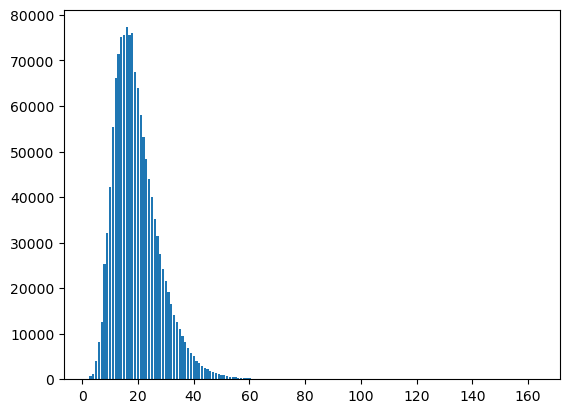

In [10]:
length_list = df['morphs_length'].tolist()
length_list.sort()
length_cnt = Counter(length_list)

x = length_cnt.keys()
y = length_cnt.values()

plt.bar(x, y)
plt.show()

- 텍스트 데이터 형태소 분석 결과 : 대부분 14개(전체 데이터의 약 25%) ~ 24개 (전체 데이터의 약 75%)의 형태소로 이루어져있음.

- 학습 및 테스트 데이터 약 5만개 정도 샘플링 하되 위의 형태소 개수로 이루어진 데이터셋 구축 예정. 

In [11]:
df

,tgt,morphs_ko,morphs_length
0,"그 말을 들으니 기쁘고, 저희와 거래하는 것을 고려해 주셨으면 합니다.","[그, ▁, 말, 을, ▁, 들으니, ▁, 기쁘, 고, ,, ▁, 저희, 와, ▁,...",30
1,"확실히 생각하고 있습니다만, 몇 가지 여쭤보고 싶은 게 있어요.","[확실히, ▁, 생각, 하, 고, ▁, 있, 습니다, 만, ,, ▁, 몇, ▁, 가...",27
2,오늘날 세계 5가구 중 1가구는 고양이나 개 또는 둘 다를 키우고 있습니다.,"[오늘날, ▁, 세계, ▁, 5, 가구, ▁, 중, ▁, 1, 가구, 는, ▁, 고...",31
3,"그들에게 말하면, 저희가 그 아이들을 돌볼 것입니다.","[그, 들, 에게, ▁, 말, 하, 면, ,, ▁, 저희, 가, ▁, 그, ▁, 아...",23
4,"좋아요, 수영은 어떤가요?","[좋, 아요, ,, ▁, 수영, 은, ▁, 어떤, 가요, ?]",10
...,...,...,...
1350340,가상 현실이 장비들에 통합됩니다.,"[가상, ▁, 현실, 이, ▁, 장비, 들, 에, ▁, 통합, 됩니다, .]",12
1350341,귀하의 운동 경험을 향상시키는 프로그램이 있습니다.,"[귀하, 의, ▁, 운동, ▁, 경험, 을, ▁, 향상, 시키, 는, ▁, 프로그램...",18
1350342,자극을 주어 피로감을 줄여줍니다.,"[자극, 을, ▁, 주어, ▁, 피로감, 을, ▁, 줄여, 줍니다, .]",11
1350343,주문하신 상품은 결제 후 영업일 기준으로 3일 후에 발송됩니다.,"[주문, 하, 신, ▁, 상품, 은, ▁, 결제, ▁, 후, ▁, 영업, 일, ▁,...",26


In [12]:
df_idx = [i for i in range(len(df)) if 14 <= df['morphs_length'][i] < 25]

In [13]:
# 약 50만개의 데이터가 걸러짐
print(len(df))
print(len(df_idx))
df2 = df.loc[df_idx]
df2.reset_index(inplace=True, drop=True)

1350345
714548


In [17]:
sample = random_sampling(df2, random_seed=123, sample_num=50000, data = 'test')
other = random_sampling(df2, random_seed=123, sample_num=50000, data = 'train')
testset = random_sampling(other, random_seed=123, sample_num=5000, data = 'test')

In [18]:
sample['replace_morphs_text'] = sample['morphs_ko'].apply(lambda x: ' '.join(x))

In [19]:
testset['replace_morphs_text'] = testset['morphs_ko'].apply(lambda x: ' '.join(x))

In [21]:
testset[['tgt']].to_csv('../../data/sample/colloquial_sample_test.csv', index=False, encoding='utf-8-sig')

In [25]:
with open('colloquial_replace_morphs2.txt', 'w') as f:
    for line in sample.replace_morphs_text.values:
        try:
            f.write(line + '\n')
        except:
            print(line)

#### Subword 분절

- 서브워드 분절은 기본적으로 '단어는 의미를 가진 더 작은 서브워드들의 조합으로 이루어진다'는 가정하에 적용되는 알고리즘

- 적절한 서브워드를 발견하여 해당 단위로 쪼개어주면 어휘수를 줄일 수 있고 희소성을 효과적으로 줄일 수 있다.

- 신조어나 오타와 같은 UNK에 대해 서브워드 단위나 문자 단위로 쪼개줌으로써 기존 훈련 데이터에서 보았던 토큰들의 조합으로 만들 수 있다.

- 자연어 전처리에 필수 절차이다.


- Huggingface tokenizer
    - byte level bpe tokenizer
    - char bpe tokenizer
    - sentencepiece bpe tokenizer
    - bert wordpiece tokenizer


- 한국어 Subword 순서
    * src, tgt 둘다 실행.
    
    1. Mecab 등의 분절기로 분절후 Subword 수행.

In [26]:
from tokenizers import SentencePieceBPETokenizer, Tokenizer

In [27]:
tokenizer = SentencePieceBPETokenizer()

In [29]:
%%time
# train
min_frequency = 5
vocab_size = 30000

tokenizer.train(["../../data/sample/colloquial_replace_morphs.txt"], vocab_size=vocab_size, min_frequency=min_frequency)
tokenizer




CPU times: user 3.88 s, sys: 1.22 s, total: 5.1 s
Wall time: 656 ms


Tokenizer(vocabulary_size=8044, model=SentencePieceBPE, unk_token=<unk>, replacement=▁, add_prefix_space=True, dropout=None)

In [30]:
for t in sample.replace_morphs_text.values[:5]:
    output = tokenizer.encode(t)
    print(t)
    print(output.ids)
    print(''.join(output.tokens))
    print(output.offsets, '\n')

편안 하 고 ▁ 편안 한 ▁ 매트리스 는 ▁ 수면 에 ▁ 이상 적 입니다 .
[1615, 1008, 1019, 67, 67, 1615, 1024, 67, 67, 3904, 1005, 67, 67, 4110, 1006, 67, 67, 1392, 1066, 1037, 1001]
▁편안▁하▁고▁▁▁편안▁한▁▁▁매트리스▁는▁▁▁수면▁에▁▁▁이상▁적▁입니다▁.
[(0, 2), (2, 4), (4, 6), (6, 7), (7, 8), (8, 11), (11, 13), (13, 14), (14, 15), (15, 20), (20, 22), (22, 23), (23, 24), (24, 27), (27, 29), (29, 30), (30, 31), (31, 34), (34, 36), (36, 40), (40, 42)] 

경매 에서 ▁ 이기 고 ▁ 시도 하 는 ▁ 것 은 ▁ 재미있 어요 .
[3492, 1049, 67, 67, 7472, 1019, 67, 67, 2314, 1008, 1005, 67, 67, 1042, 1014, 67, 67, 2917, 1043, 1001]
▁경매▁에서▁▁▁이기▁고▁▁▁시도▁하▁는▁▁▁것▁은▁▁▁재미있▁어요▁.
[(0, 2), (2, 5), (5, 6), (6, 7), (7, 10), (10, 12), (12, 13), (13, 14), (14, 17), (17, 19), (19, 21), (21, 22), (22, 23), (23, 25), (25, 27), (27, 28), (28, 29), (29, 33), (33, 36), (36, 38)] 

네 , ▁ 여기 에 는 ▁ 분실 , ▁ 도난 ▁ 또는 ▁ 손상 된 ▁ 수하물 이 ▁ 포함 됩니다 .
[1068, 1013, 67, 67, 1212, 1006, 1005, 67, 67, 4248, 1013, 67, 67, 5199, 67, 67, 1578, 67, 67, 2361, 1167, 67, 67, 3162, 1004, 67, 67, 1299, 1120, 1001]
▁네▁,▁▁▁여기▁에▁는

In [31]:
def tokenizer_text(text, tokenizer):
    output = tokenizer.encode(text)
    tok_text = ''.join(output.tokens)
    return tok_text.replace('▁▁▁', '▁▁')

def detokenizer_text(text):
    return text.replace(' ', '').replace('▁▁', ' ').replace('▁','')

In [34]:

# 원본으로 복원 예제
t = '▁당사▁의▁▁A▁스마트▁▁비서▁는▁▁AI▁▁기반▁▁도우미▁입니다▁.'
t.replace(' ', '').replace('▁▁', ' ').replace('▁','')

# save
tokenizer.save('../../data/subword_tokenizer/my-tokenizer.json')

#load
tokenizer2 = Tokenizer.from_file("../../data/subword_tokenizer/my-tokenizer.json")


In [35]:
tokenizer_text(sample['replace_morphs_text'][0], tokenizer)

'▁편안▁하▁고▁▁편안▁한▁▁매트리스▁는▁▁수면▁에▁▁이상▁적▁입니다▁.'

In [36]:
sample['tokenizing_text'] = sample['replace_morphs_text'].apply(lambda x: tokenizer_text(x, tokenizer))

In [37]:
sample.to_csv('../../data/sample/colloquial_sample_subword.csv', index=False, encoding='utf-8-sig')

In [89]:
detokenizer_text(sample['tokenizing_text'][1])

'그래서 우체국을 방문하면 주변에 나이 드신 분들이 많이 보입니다.'

In [90]:
sample['tgt'][1]

'그래서 우체국을 방문하면 주변에 나이 드신 분들이 많이 보입니다.'